In [ ]:
!pip install insightface -q


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 439.5/439.5 kB 7.7 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.0/16.0 MB 52.8 MB/s eta 0:00:00


In [ ]:
!pip install onnxruntime -q

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.0/16.0 MB 40.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.0/46.0 kB 3.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.8/86.8 kB 5.4 MB/s eta 0:00:00


In [ ]:
import os
import cv2
import numpy as np
import insightface
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from torch.utils.data import Dataset, DataLoader
from tqdm import tqdm
import joblib


ModuleNotFoundError: No module named 'insightface'

In [ ]:
import os
import cv2
import numpy as np
import insightface
from sklearn.preprocessing import LabelEncoder
from torch.utils.data import Dataset, DataLoader
from tqdm import tqdm

# Path to the folder containing face images (ensure the path is correct)
input_path = '/content/drive/MyDrive/Mini/augmented_faces'  # Adjust path as needed

# Initialize the model from InsightFace
model = insightface.app.FaceAnalysis()
model.prepare(ctx_id=0)  # Use GPU if available, else CPU (ctx_id=-1)

# Initialize lists for embeddings and labels
embeddings = []
labels = []

# Label Encoder
label_encoder = LabelEncoder()

# Traverse the directory and process each image
for student_folder in os.listdir(input_path):
    student_folder_path = os.path.join(input_path, student_folder)

    if not os.path.isdir(student_folder_path):
        continue

    # Loop through each image of the student
    for img_name in os.listdir(student_folder_path):
        img_path = os.path.join(student_folder_path, img_name)

        # Load the image
        img = cv2.imread(img_path)
        if img is None:
            continue

        # Detect faces and extract embeddings using ArcFace
        faces = model.get(img)

        if len(faces) > 0:
            embedding = faces[0].embedding  # Take the first face (you can refine this further if needed)
            embeddings.append(embedding)
            labels.append(student_folder)  # Label is the student's folder name (can be adjusted as needed)

# Encode the labels (student names or IDs)
labels_encoded = label_encoder.fit_transform(labels)

# Convert to numpy arrays
embeddings = np.array(embeddings)
labels_encoded = np.array(labels_encoded)

# Check the shapes
print(f"Embeddings shape: {embeddings.shape}")
print(f"Labels shape: {labels_encoded.shape}")


download_path: /root/.insightface/models/buffalo_l


100%|██████████| 281857/281857 [00:04<00:00, 64183.87KB/s]
/usr/local/lib/python3.11/dist-packages/onnxruntime/capi/onnxruntime_inference_collection.py:118: UserWarning: Specified provider 'CUDAExecutionProvider' is not in available provider names.Available providers: 'AzureExecutionProvider, CPUExecutionProvider'
  warnings.warn(


Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: /root/.insightface/models/buffalo_l/1k3d68.onnx landmark_3d_68 ['None', 3, 192, 192] 0.0 1.0
Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: /root/.insightface/models/buffalo_l/2d106det.onnx landmark_2d_106 ['None', 3, 192, 192] 0.0 1.0
Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: /root/.insightface/models/buffalo_l/det_10g.onnx detection [1, 3, '?', '?'] 127.5 128.0
Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: /root/.insightface/models/buffalo_l/genderage.onnx genderage ['None', 3, 96, 96] 0.0 1.0
Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: /root/.insightface/models/buffalo_l/w600k_r50.onnx recognition ['None', 3, 112, 112] 127.5 127.5
set det-size: (640, 640)
Embeddings s

In [ ]:
import joblib

# Save embeddings and labels as files
joblib.dump(embeddings, '/content/drive/MyDrive/Mini/embeddings.pkl')
joblib.dump(labels, '/content/drive/MyDrive/Mini/labels.pkl')

print("Embeddings and labels saved!")


Embeddings and labels saved!


In [ ]:
import joblib
import numpy as np

# Load the saved embeddings and labels
embeddings = joblib.load('/content/drive/MyDrive/Mini/embeddings.pkl')
labels = joblib.load('/content/drive/MyDrive/Mini/labels.pkl')

# Convert embeddings and labels to NumPy arrays if they're lists
embeddings = np.array(embeddings)
labels = np.array(labels)

print(f"Loaded embeddings shape: {embeddings.shape}")
print(f"Loaded labels shape: {labels.shape}")


Loaded embeddings shape: (100, 512)
Loaded labels shape: (100,)


# Cosine **Similarity**

/usr/local/lib/python3.11/dist-packages/onnxruntime/capi/onnxruntime_inference_collection.py:118: UserWarning: Specified provider 'CUDAExecutionProvider' is not in available provider names.Available providers: 'AzureExecutionProvider, CPUExecutionProvider'
  warnings.warn(


Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: /root/.insightface/models/buffalo_l/1k3d68.onnx landmark_3d_68 ['None', 3, 192, 192] 0.0 1.0
Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: /root/.insightface/models/buffalo_l/2d106det.onnx landmark_2d_106 ['None', 3, 192, 192] 0.0 1.0
Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: /root/.insightface/models/buffalo_l/det_10g.onnx detection [1, 3, '?', '?'] 127.5 128.0
Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: /root/.insightface/models/buffalo_l/genderage.onnx genderage ['None', 3, 96, 96] 0.0 1.0
Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: /root/.insightface/models/buffalo_l/w600k_r50.onnx recognition ['None', 3, 112, 112] 127.5 127.5
set det-size: (640, 640)
Bounding box

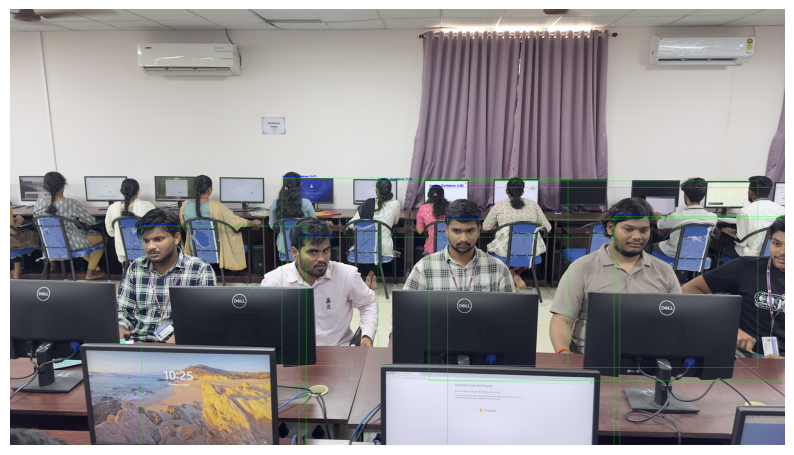

In [ ]:
import cv2
import joblib
import numpy as np
from insightface.app import FaceAnalysis
from sklearn.metrics.pairwise import cosine_similarity
import matplotlib.pyplot as plt

# Load the stored embeddings and labels (you should have already saved these)
embeddings = joblib.load('/content/drive/MyDrive/Mini/embeddings.pkl')
labels = joblib.load('/content/drive/MyDrive/Mini/labels.pkl')

# Set a threshold for cosine similarity to consider a person "known"
similarity_threshold = 0.7  # You can adjust this value based on your preference

# Initialize the face detector
face_app = FaceAnalysis()
face_app.prepare(ctx_id=0)  # ctx_id=0 for CPU (use 1 for GPU)

# Load the group image
img_path = '/content/drive/MyDrive/Mini/group images/group img 4.jpg'
img = cv2.imread(img_path)

# Get faces from the image using MTCNN
faces = face_app.get(img)

# List to hold embeddings and detected face regions
embeddings_detected = []
face_locations = []

for face in faces:
    embedding = face.embedding  # Extract the face embedding
    embeddings_detected.append(embedding)
    face_locations.append(face.bbox)  # Store the bounding box of the face

    # Print the bounding box to understand its structure
    print(f"Bounding box: {face.bbox}")

# Convert detected embeddings to a numpy array for similarity calculation
embeddings_detected = np.array(embeddings_detected)

# Check if there are any detected faces
if embeddings_detected.shape[0] > 0:
    for detected_embedding, location in zip(embeddings_detected, face_locations):
        # Compute cosine similarity between the detected face embedding and stored embeddings
        similarities = cosine_similarity([detected_embedding], embeddings)

        # Find the index of the most similar face
        most_similar_index = np.argmax(similarities)

        # Get the corresponding label (roll number or name) of the most similar face
        predicted_label = labels[most_similar_index]
        highest_similarity = similarities[0][most_similar_index]

        # Only print the label if the similarity is above the threshold
        if highest_similarity >= similarity_threshold:
            label_text = f"ID: {predicted_label} (Confidence: {highest_similarity:.2f})"
        else:
            label_text = f"Unknown (Confidence: {highest_similarity:.2f})"

        # Print the predicted label and score
        print(f"Predicted label: {predicted_label}, Confidence score: {highest_similarity:.2f}")

        # Draw bounding box and predicted label on the image
        location = np.array(location, dtype=int)
        if len(location) == 4:
            x, y, w, h = location
            cv2.rectangle(img, (x, y), (x + w, y + h), (0, 255, 0), 2)
            cv2.putText(img, label_text, (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.8, (255, 0, 0), 2, cv2.LINE_AA)

    # Convert BGR to RGB for displaying with matplotlib
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    # Display the image with predictions
    plt.figure(figsize=(10, 10))
    plt.imshow(img_rgb)
    plt.axis('off')
    plt.show()
else:
    print("No faces detected in the image.")


# Other Recognition Methods

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import TensorDataset, DataLoader, random_split
import joblib
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report

# Load embeddings and labels
X = joblib.load('/content/drive/MyDrive/Mini/embeddings.pkl')
y = joblib.load('/content/drive/MyDrive/Mini/labels.pkl')

# Encode labels to integers (e.g., 'abhinav' -> 0, 'hemanth' -> 1, etc.)
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# Convert to torch tensors
X_tensor = torch.tensor(np.array(X), dtype=torch.float32)
y_tensor = torch.tensor(np.array(y_encoded), dtype=torch.long)

# Create dataset
dataset = TensorDataset(X_tensor, y_tensor)

# Split into train and test sets (80-20)
train_size = int(0.8 * len(dataset))
test_size = len(dataset) - train_size
train_data, test_data = random_split(dataset, [train_size, test_size])

train_loader = DataLoader(train_data, batch_size=16, shuffle=True)
test_loader = DataLoader(test_data, batch_size=16)

# Define the neural network
class FaceClassifier(nn.Module):
    def __init__(self, input_dim=512, num_classes=24):
        super(FaceClassifier, self).__init__()
        self.classifier = nn.Sequential(
            nn.Linear(input_dim, 256),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(256, 128),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(128, num_classes)
        )

    def forward(self, x):
        return self.classifier(x)

# Initialize model, loss, optimizer
model = FaceClassifier()
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training loop
epochs = 50
for epoch in range(epochs):
    model.train()
    total_loss = 0
    for inputs, labels in train_loader:
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        total_loss += loss.item()

    print(f"Epoch [{epoch+1}/{epochs}], Loss: {total_loss:.4f}")

# Evaluation
model.eval()
y_true, y_pred = [], []

with torch.no_grad():
    for inputs, labels in test_loader:
        outputs = model(inputs)
        preds = torch.argmax(outputs, dim=1)
        y_true.extend(labels.cpu().numpy())
        y_pred.extend(preds.cpu().numpy())


# Include all 21 classes, even if some are missing in test set
all_classes = list(range(len(le.classes_)))
print("\n🧾 Classification Report:")
print(classification_report(y_true, y_pred, labels=all_classes, target_names=le.classes_))

Epoch [1/50], Loss: 14.9916
Epoch [2/50], Loss: 11.6858
Epoch [3/50], Loss: 8.0276
Epoch [4/50], Loss: 5.0469
Epoch [5/50], Loss: 2.5899
Epoch [6/50], Loss: 1.3320
Epoch [7/50], Loss: 0.5930
Epoch [8/50], Loss: 0.3678
Epoch [9/50], Loss: 0.1799
Epoch [10/50], Loss: 0.2184
Epoch [11/50], Loss: 0.0938
Epoch [12/50], Loss: 0.1198
Epoch [13/50], Loss: 0.0455
Epoch [14/50], Loss: 0.0877
Epoch [15/50], Loss: 0.0411
Epoch [16/50], Loss: 0.0337
Epoch [17/50], Loss: 0.0277
Epoch [18/50], Loss: 0.0751
Epoch [19/50], Loss: 0.0300
Epoch [20/50], Loss: 0.0196
Epoch [21/50], Loss: 0.0179
Epoch [22/50], Loss: 0.0321
Epoch [23/50], Loss: 0.0194
Epoch [24/50], Loss: 0.0201
Epoch [25/50], Loss: 0.0135
Epoch [26/50], Loss: 0.0136
Epoch [27/50], Loss: 0.0134
Epoch [28/50], Loss: 0.0287
Epoch [29/50], Loss: 0.0080
Epoch [30/50], Loss: 0.0144
Epoch [31/50], Loss: 0.0105
Epoch [32/50], Loss: 0.0135
Epoch [33/50], Loss: 0.0084
Epoch [34/50], Loss: 0.0096
Epoch [35/50], Loss: 0.0109
Epoch [36/50], Loss: 0.0231

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/me

In [ ]:
# Save the trained model
torch.save(model.state_dict(), '/content/drive/MyDrive/Mini/face_classifier.pth')

# Save the label encoder
joblib.dump(le, '/content/drive/MyDrive/Mini/label_encoder.pkl')


['/content/drive/MyDrive/Mini/label_encoder.pkl']

In [ ]:
pip install dlib


In [ ]:
import joblib
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Split data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(embeddings, labels, test_size=0.2, random_state=42)

# Initialize KNN classifier (you can adjust n_neighbors for better accuracy)
knn = KNeighborsClassifier(n_neighbors=3)

# Train the KNN model on the training data
knn.fit(X_train, y_train)

# Predict on the test set
y_pred = knn.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"KNN Classification Accuracy: {accuracy * 100:.2f}%")

# Example usage: Predict the label for a new face embedding
# Replace 'new_face_embedding' with the actual face embedding you want to classify
new_face_embedding = embeddings[0]  # Just as an example
predicted_label = knn.predict([new_face_embedding])

print(f"Predicted label for the new face: {predicted_label[0]}")

# You can also save the trained KNN model for later use
joblib.dump(knn, '/content/drive/MyDrive/Mini/knn_model.pkl')
print("KNN model saved!")

KNN Classification Accuracy: 90.00%
Predicted label for the new face: 5464
KNN model saved!


In [ ]:
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
import joblib

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(embeddings, labels, test_size=0.2, random_state=42)

# Apply PCA to reduce dimensions (n_components should be <= min(samples, features))
n_components = min(X_train.shape[0], X_train.shape[1])  # Ensure it's <= number of samples or features
pca = PCA(n_components=n_components, whiten=True, random_state=42)

# Fit PCA on training data and transform
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

# Initialize the SVM classifier
svm_classifier = SVC(kernel='linear', probability=True)

# Train the SVM classifier on PCA-transformed data
svm_classifier.fit(X_train_pca, y_train)

# Predict on the test set
y_pred = svm_classifier.predict(X_test_pca)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"PCA + SVM Classification Accuracy: {accuracy * 100:.2f}%")

# Save both PCA and SVM models
joblib.dump(pca, '/content/drive/MyDrive/Mini/pca_model.pkl')
joblib.dump(svm_classifier, '/content/drive/MyDrive/Mini/svm_classifier.pkl')
print("PCA and SVM models saved!")


PCA + SVM Classification Accuracy: 80.00%
PCA and SVM models saved!


/usr/local/lib/python3.11/dist-packages/onnxruntime/capi/onnxruntime_inference_collection.py:118: UserWarning: Specified provider 'CUDAExecutionProvider' is not in available provider names.Available providers: 'AzureExecutionProvider, CPUExecutionProvider'
  warnings.warn(


Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: /root/.insightface/models/buffalo_l/1k3d68.onnx landmark_3d_68 ['None', 3, 192, 192] 0.0 1.0
Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: /root/.insightface/models/buffalo_l/2d106det.onnx landmark_2d_106 ['None', 3, 192, 192] 0.0 1.0
Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: /root/.insightface/models/buffalo_l/det_10g.onnx detection [1, 3, '?', '?'] 127.5 128.0
Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: /root/.insightface/models/buffalo_l/genderage.onnx genderage ['None', 3, 96, 96] 0.0 1.0
Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: /root/.insightface/models/buffalo_l/w600k_r50.onnx recognition ['None', 3, 112, 112] 127.5 127.5
set det-size: (640, 640)
Bounding box

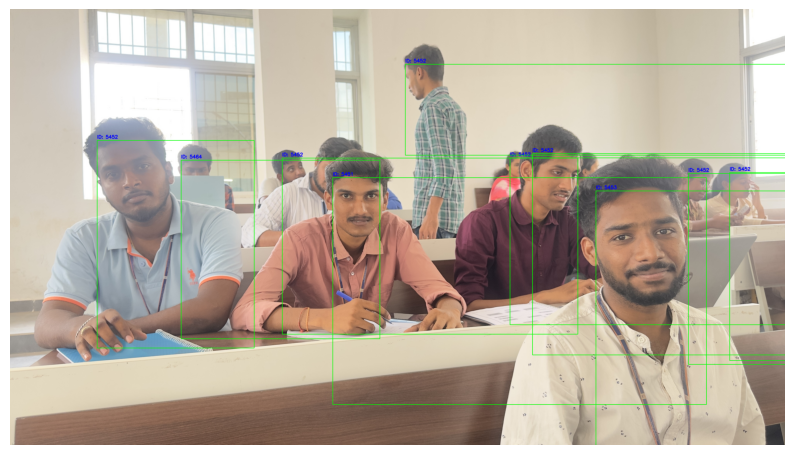

In [ ]:
import cv2
import joblib
import numpy as np
from insightface.app import FaceAnalysis
import matplotlib.pyplot as plt

# Load the trained SVM model
svm_classifier = joblib.load('/content/drive/MyDrive/Mini/svm_classifier.pkl')

# Initialize the face detector
face_app = FaceAnalysis()
face_app.prepare(ctx_id=0)  # ctx_id=0 for CPU (use 1 for GPU)

# Load the group image
img_path = '/content/drive/MyDrive/Mini/group images/group img 1.jpg'
img = cv2.imread(img_path)

# Get faces from the image using MTCNN
faces = face_app.get(img)

# List to hold embeddings and detected face regions
embeddings = []
face_locations = []

for face in faces:
    embedding = face.embedding  # Extract the face embedding
    embeddings.append(embedding)
    face_locations.append(face.bbox)  # Store the bounding box of the face

    # Print the bounding box to understand its structure
    print(f"Bounding box: {face.bbox}")

# Convert embeddings to numpy array for prediction
embeddings = np.array(embeddings)

# Predict using the SVM model
if embeddings.shape[0] > 0:  # Check if faces were detected
    predictions = svm_classifier.predict(embeddings)

    # Convert predictions back to labels
    for i, (pred, location) in enumerate(zip(predictions, face_locations)):
        # Debug: print the location of the face
        print(f"Predicted ID: {pred}, Face location: {location}")

        # Convert bounding box coordinates to integers
        location = np.array(location, dtype=int)

        # Check if location is in the correct format (4 values: x, y, w, h)
        if len(location) == 4:
            x, y, w, h = location
            cv2.rectangle(img, (x, y), (x + w, y + h), (0, 255, 0), 2)

            # Put predicted label (roll number or name) on the image
            cv2.putText(img, f"ID: {pred}", (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.8, (255, 0, 0), 2, cv2.LINE_AA)

    # Convert BGR to RGB for displaying with matplotlib
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    # Display the image with predictions
    plt.figure(figsize=(10, 10))
    plt.imshow(img_rgb)
    plt.axis('off')
    plt.show()
else:
    print("No faces detected in the image.")


In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(embeddings, labels, test_size=0.2, random_state=42)

# Initialize the SVM classifier
svm_classifier = SVC(kernel='linear', probability=True)

# Train the SVM classifier
svm_classifier.fit(X_train, y_train)

# Predict on the test set
y_pred = svm_classifier.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"SVM Classification Accuracy: {accuracy * 100:.2f}%")

# Save the trained SVM model
joblib.dump(svm_classifier, '/content/drive/MyDrive/Mini/svm_classifier.pkl')
print("SVM classifier saved!")

SVM Classification Accuracy: 90.00%
SVM classifier saved!
